https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.data.shape)

(1797, 64)


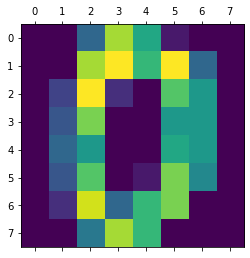

In [3]:
import matplotlib.pyplot as plt
#plt.gray()
plt.matshow(digits.images[0])

plt.show()

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
X=digits.data
y=digits.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25,10,10), max_iter=300, random_state=1,
                    learning_rate_init=.0002)

In [24]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(25, 10, 10), learning_rate_init=0.0002,
              max_iter=300, random_state=1)

In [25]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.941812
Test set score: 0.883838


In [27]:
mlp.coefs_[0].shape

(64, 25)

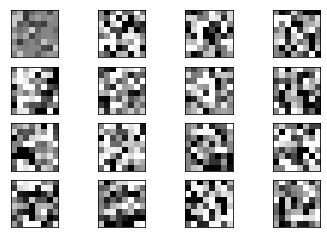

In [26]:

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())